# Imports

In [2]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
import scipy.stats as stats 
import sympy as sy 
from scipy.optimize import fsolve
import time
import os

In [5]:
from functions.plot import *
from models.model import model 
from models.model import model_gamma_4_16, model_gamma_02_08

# Constants

In [3]:
# # We want to take time horizon as 100 years which is 36525 days including the years with more or less days
u0List = [16000 * i for i in [0,1,2,3,4,5]]
thetaList = [0.01, 0.1, 0.5, 0.9, 1 ,2]

In [4]:
# Find the time horizon (we found it to be 2000 )
LAMBDA_ARRIVAL= 4
CLAIMSIZE_MEAN = 16000 
TIME_HORIZON = 2000  
# we will try to find a time horizon that is not very big, but enough to simulate 
# model(2000, lambda_arrival, claimSize_mean).simulate((16000,), (0.01,))

In [ ]:

# Approximation 1
def equation(R, theta, a=10000, b=22000, E_Xi=16000):
    return 1 + (1 + theta) * E_Xi * R - (np.exp(b * R) - np.exp(a * R)) / (R * (b - a))

def check_equivalence(sol, theta_value):

    val1 = expr1.subs({a:10000, b:22000, R:sol, theta:theta_value}).evalf()
    val2 = expr2.subs({a:10000, b:22000, R:sol }).evalf()
    f = lambda x: np.float64(x)

    return np.isclose(f(val1),f(val2), atol=1e-9, rtol=1e-9)

In [ ]:
# We find the smallest R possible within 

sol = np.inf
lastValue = None 
valList = []
for j in range(len(thetaList)):
    for i in range(500, 0, -1): # this is accurate in between [1e300, 1e-300]   
        val = fsolve(equation, x0=float(f"0.01"), args=(thetaList[j]))[0]
    
    if val < 0: # we are looking for the positive solution 
        continue

    if (val < sol) and (check_equivalence(val, thetaList[j])):
        valList.append(val)
        lastValue = i-300


for i in range(len(thetaList)):
    print(f"For theta value: {thetaList[i]}, the value of R is: {valList[i]}")

For theta value: 0.01, the value of R is: 1.1858148866695392e-06
For theta value: 0.1, the value of R is: 1.1176320622201771e-05
For theta value: 0.5, the value of R is: 4.504943160794222e-05
For theta value: 0.9, the value of R is: 6.874582233410305e-05
For theta value: 1, the value of R is: 7.368425288484671e-05
For theta value: 2, the value of R is: 0.00011059994869610284


In [ ]:
theta, R, u, E_Xi= sy.symbols("theta R u E_Xi")
psi = sy.Function("psi")(u)
E_Xi=16000

approx1 = sy.Eq(psi, (1/(1+theta))*sy.exp(-R*u))
approx2 = sy.Eq(psi,(1/(1+theta))*sy.exp(-(theta)/((1+theta)*E_Xi)*u))
approx1_subs = []
approx2_subs = []

for i in range(len(thetaList)):
    for j in range(len(u0List)):
        subs_result1 = approx1.subs({theta: thetaList[i], R: valList[i], u: u0List[j]})
        subs_result2 = approx2.subs({theta: thetaList[i], E_Xi: E_Xi, u: u0List[j]})
        approx1_subs.append(subs_result1)
        approx2_subs.append(subs_result2)

psi_values1 = []
for eq in approx1_subs:
    result = sy.solve(eq)
    psi_values1.append(result)


psi_values2 = []
for eq in approx2_subs:
    result = sy.solve(eq)
    psi_values2.append(result)


results_approx1 = []
results_approx2 = []
for i, theta_val in enumerate(thetaList):
    for j, u_val in enumerate(u0List):
        psi1 = psi_values1[i * len(u0List) + j]
        psi2 = psi_values2[i * len(u0List) + j]
        results_approx1.append([theta_val, u_val, psi1])
        results_approx2.append([theta_val, u_val, psi2])


for i in range(len(thetaList)):
    print(f"For theta: {results_approx1[i][0]} and u0: {results_approx1[i][1]}, Ruin Probability for Approx1 is: {results_approx1[i][2]}")
    print(f"For theta: {results_approx2[i][0]} and u0: {results_approx2[i][1]}, Ruin Probability for Approx2 is: {results_approx2[i][2]}")
    print("")

df_approx1 = pd.DataFrame(results_approx1, columns=["Theta", "u0", "Ruin Probability Approx1"])
df_approx2 = pd.DataFrame(results_approx2, columns=["Theta", "u0", "Ruin Probability Approx2"])


approx1_csv_path = "./results/q4_results_approx1.csv"
approx2_csv_path = "./results/q4_results_approx2.csv"

df_approx1.to_csv(approx1_csv_path, index=False)
df_approx2.to_csv(approx2_csv_path, index=False)

approx1_csv_path, approx2_csv_path



For theta: 0.01 and u0: 0, Ruin Probability for Approx1 is: [{psi(0): 0.990099009900990}]
For theta: 0.01 and u0: 0, Ruin Probability for Approx2 is: [{psi(0): 0.990099009900990}]

For theta: 0.01 and u0: 16000, Ruin Probability for Approx1 is: [{psi(16000): 0.971490907895252}]
For theta: 0.01 and u0: 16000, Ruin Probability for Approx2 is: [{psi(16000): 0.980344419146587}]

For theta: 0.01 and u0: 32000, Ruin Probability for Approx1 is: [{psi(32000): 0.953232529964372}]
For theta: 0.01 and u0: 32000, Ruin Probability for Approx2 is: [{psi(32000): 0.970685931953377}]

For theta: 0.01 and u0: 48000, Ruin Probability for Approx1 is: [{psi(48000): 0.935317303330079}]
For theta: 0.01 and u0: 48000, Ruin Probability for Approx2 is: [{psi(48000): 0.961122601495943}]

For theta: 0.01 and u0: 64000, Ruin Probability for Approx1 is: [{psi(64000): 0.917738778744100}]
For theta: 0.01 and u0: 64000, Ruin Probability for Approx2 is: [{psi(64000): 0.951653490277119}]

For theta: 0.01 and u0: 80000, 

('./results/q4_results_approx1.csv', './results/q4_results_approx2.csv')

# Q4 Comparison

<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:104: SyntaxWarning: invalid escape sequence '\p'
<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:104: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_370/3527830791.py:72: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Ruin Probability $\psi(u)$', fontsize = 12)
/tmp/ipykernel_370/3527830791.py:104: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Ruin Probability $\psi(u)$', fontsize = 12)


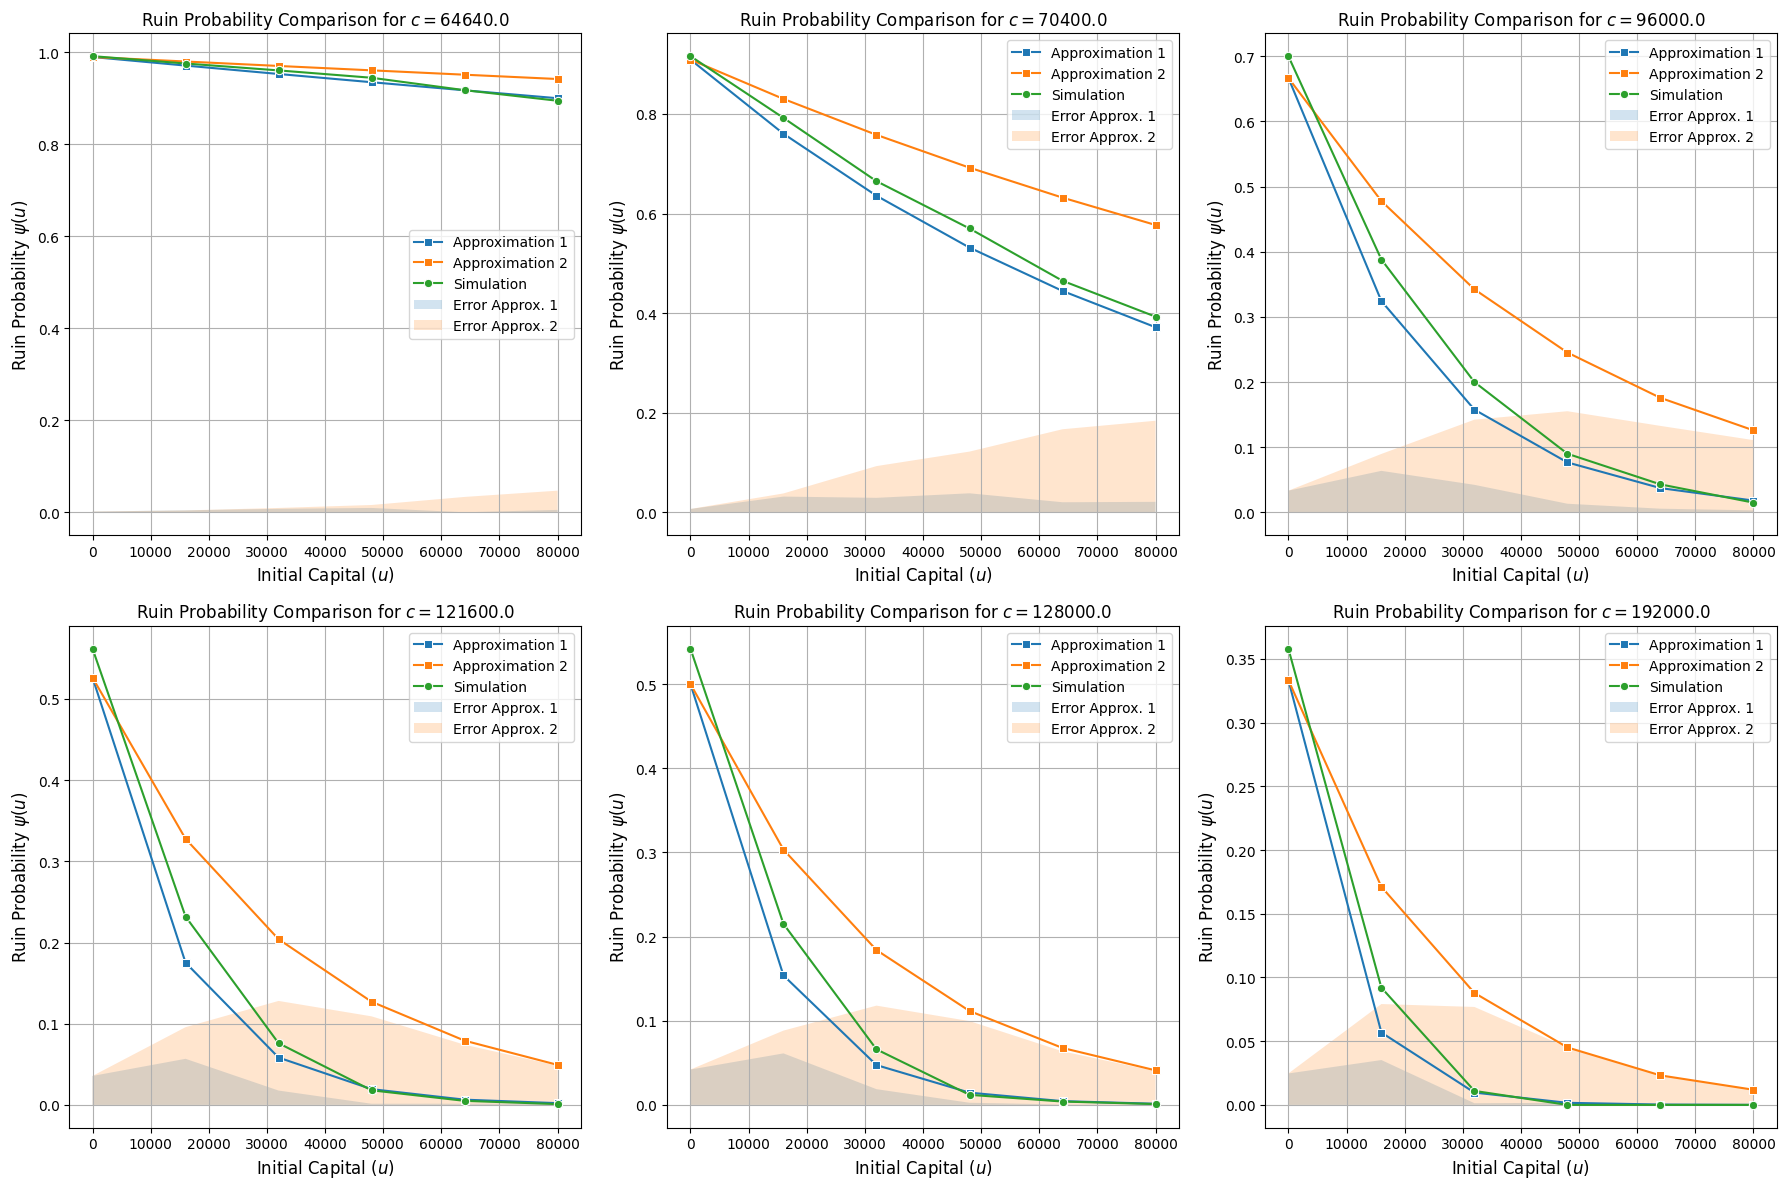

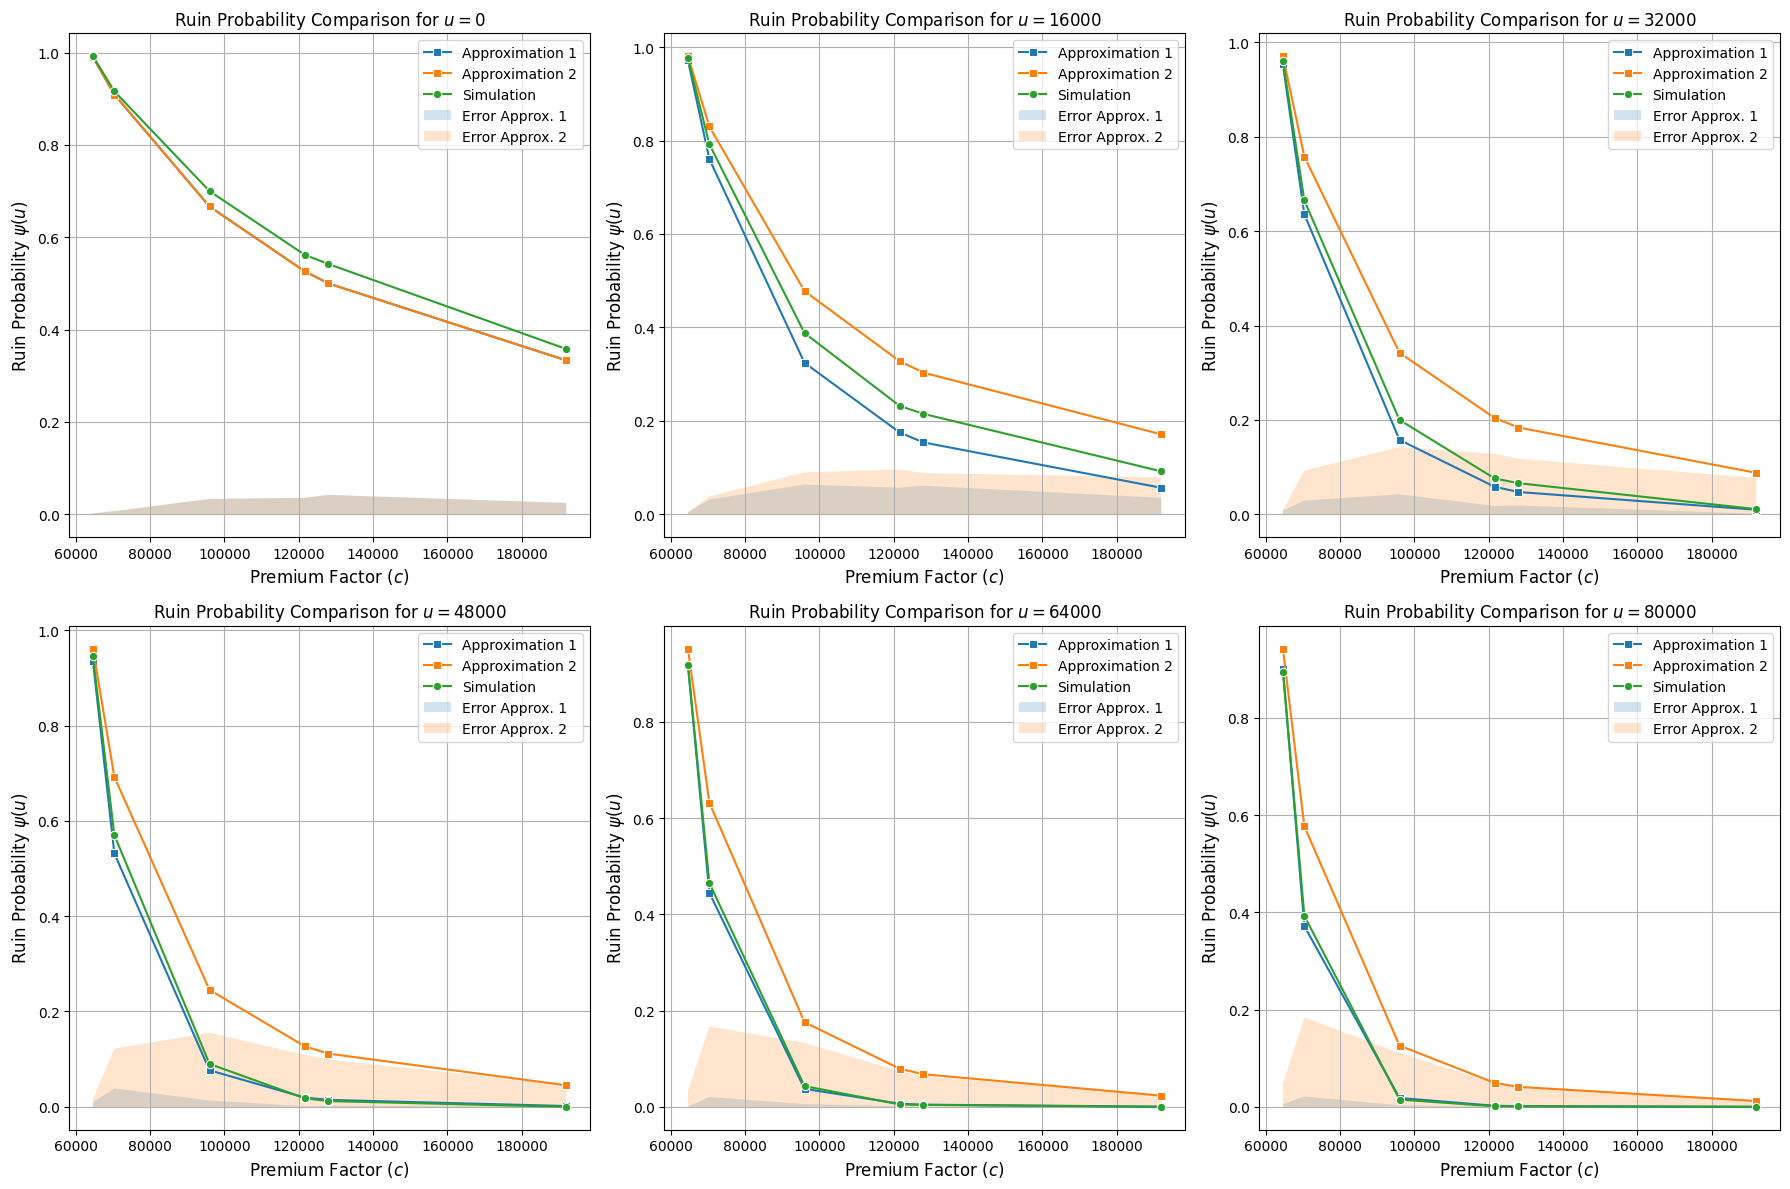

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
from statsmodels.stats.weightstats import DescrStatsW

Lambda = 4
Mean = 16000

# Load the two CSV files
sim = pd.read_csv("/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q1_model_simulation_results.csv", index_col=0)
approx1 = pd.read_csv('/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q4_results_approx1.csv')
approx2 = pd.read_csv('/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q4_results_approx2.csv')

#Orginize sim
sim = sim.reset_index().melt(id_vars='index', var_name='Theta', value_name='psi')
sim.columns = ['u0', 'Theta', 'psi']
sim['Theta'] = sim['Theta'].astype(float)
sim['u0'] = sim['u0'].astype(int)

# Helper function to evaluate expressions
def evaluate_expression(expr):
    try:
        return float(sp.N(sp.sympify(expr)))
    except (sp.SympifyError, ValueError):
        return float(expr)

# Extract ruin probabilities and evaluate symbolic expressions
approx1['psi'] = approx1['Ruin Probability Approx1'].str.extract(r':\s*([\d\.\+\-\*/\(\)eexp]+)')[0].apply(evaluate_expression)
approx2['psi'] = approx2['Ruin Probability Approx2'].str.extract(r':\s*([\d\.\+\-\*/\(\)eexp]+)')[0].apply(evaluate_expression)

# Compute 'c' and update the 'Theta' column to 'c' in all DataFrames
sim['c'] = (1 + sim['Theta']) * Lambda * Mean
approx1['c'] = (1 + approx1['Theta']) * Lambda * Mean
approx2['c'] = (1 + approx2['Theta']) * Lambda * Mean

#Compute Differences
def compute_difference(df_sim, df_approx, key):
    # Merge on 'u0', 'Theta', and 'c' to ensure consistency across all relevant columns
    merged = pd.merge(df_sim, df_approx, on=['u0', 'Theta', 'c'], suffixes=('_sim', f'_{key}'))
    merged['diff'] = abs(merged['psi_sim'] - merged[f'psi_{key}'])
    return merged

# Iterate over each unique Theta and plot separately
unique_theta =sim['Theta'].unique()

plt.figure(figsize=(18, 12))
for i, theta in enumerate(unique_theta):
    plt.subplot(2, 3, i+1)
    
    # Filter data for the current Theta
    sim_theta = sim[sim['Theta'] == theta]
    approx1_theta = approx1[approx1['Theta'] == theta]
    approx2_theta = approx2[approx2['Theta'] == theta]
    
    #Compute difs
    diff1 = compute_difference(sim_theta, approx1_theta, 'approx1')
    diff2 = compute_difference(sim_theta, approx2_theta, 'approx2')
    
    # Plot data
    sns.lineplot(data=approx1_theta, x='u0', y='psi', label='Approximation 1', marker='s')
    sns.lineplot(data=approx2_theta, x='u0', y='psi', label='Approximation 2', marker='s')
    sns.lineplot(data=sim_theta, x='u0', y='psi', label='Simulation', marker='o')
    
    # Plot shaded areas to show differences
    plt.fill_between(diff1['u0'], 0, diff1['diff'], alpha=0.2, label='Error Approx. 1')
    plt.fill_between(diff2['u0'], 0, diff2['diff'], alpha=0.2, label='Error Approx. 2')

    c = (1 + theta)*Lambda*Mean
    plt.title(f'Ruin Probability Comparison for $c = {c}$')
    plt.xlabel('Initial Capital ($u$)', fontsize = 12)
    plt.ylabel('Ruin Probability $\psi(u)$', fontsize = 12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, u0 in enumerate(sorted(sim['u0'].unique())):
    plt.subplot(2, 3, i+1)
    
    # Filter data for the current u0
    sim_u0 = sim[sim['u0'] == u0]
    approx1_u0 = approx1[approx1['u0'] == u0]
    approx2_u0 = approx2[approx2['u0'] == u0]

    #Compute difs
    diff1 = compute_difference(sim_u0, approx1_u0, 'approx1')
    diff2 = compute_difference(sim_u0, approx2_u0, 'approx2')

    # Plot data
    sns.lineplot(data=approx1_u0, x='c', y='psi', label='Approximation 1', marker='s')
    sns.lineplot(data=approx2_u0, x='c', y='psi', label='Approximation 2', marker='s')
    sns.lineplot(data=sim_u0, x='c', y='psi', label='Simulation', marker='o')

    # Plot shaded areas to show differences
    plt.fill_between(diff1['c'], 0, diff1['diff'], alpha=0.2, label='Error Approx. 1')
    plt.fill_between(diff2['c'], 0, diff2['diff'], alpha=0.2, label='Error Approx. 2')
    
    # Title and labels
    plt.title(f'Ruin Probability Comparison for $u = {u0}$')
    plt.xlabel('Premium Factor $(c)$', fontsize = 12)
    plt.ylabel('Ruin Probability $\psi(u)$', fontsize = 12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# Q5 graphs

<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:97: SyntaxWarning: invalid escape sequence '\p'
<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:97: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_370/2090724338.py:64: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Ruin Probability $\psi$', fontsize=12)
/tmp/ipykernel_370/2090724338.py:97: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Ruin Probability $\psi$', fontsize=12)


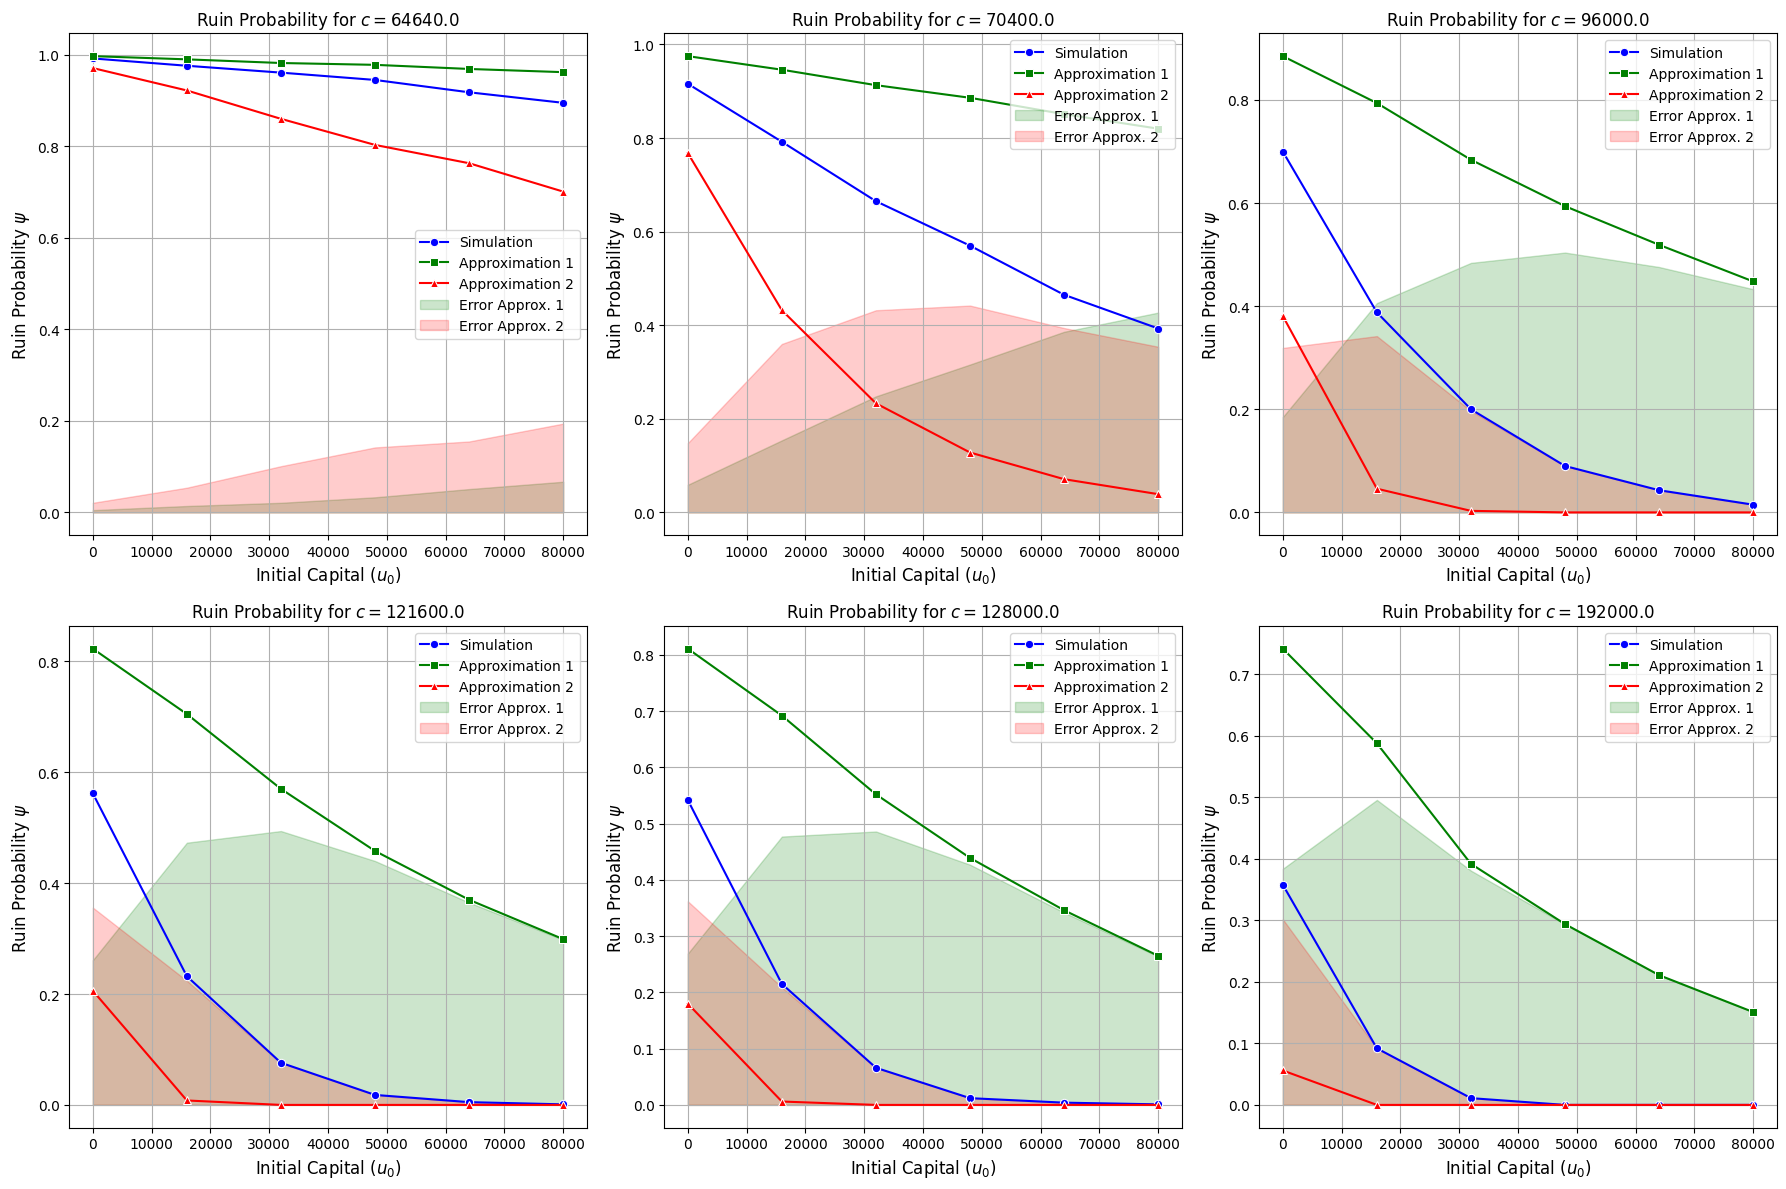

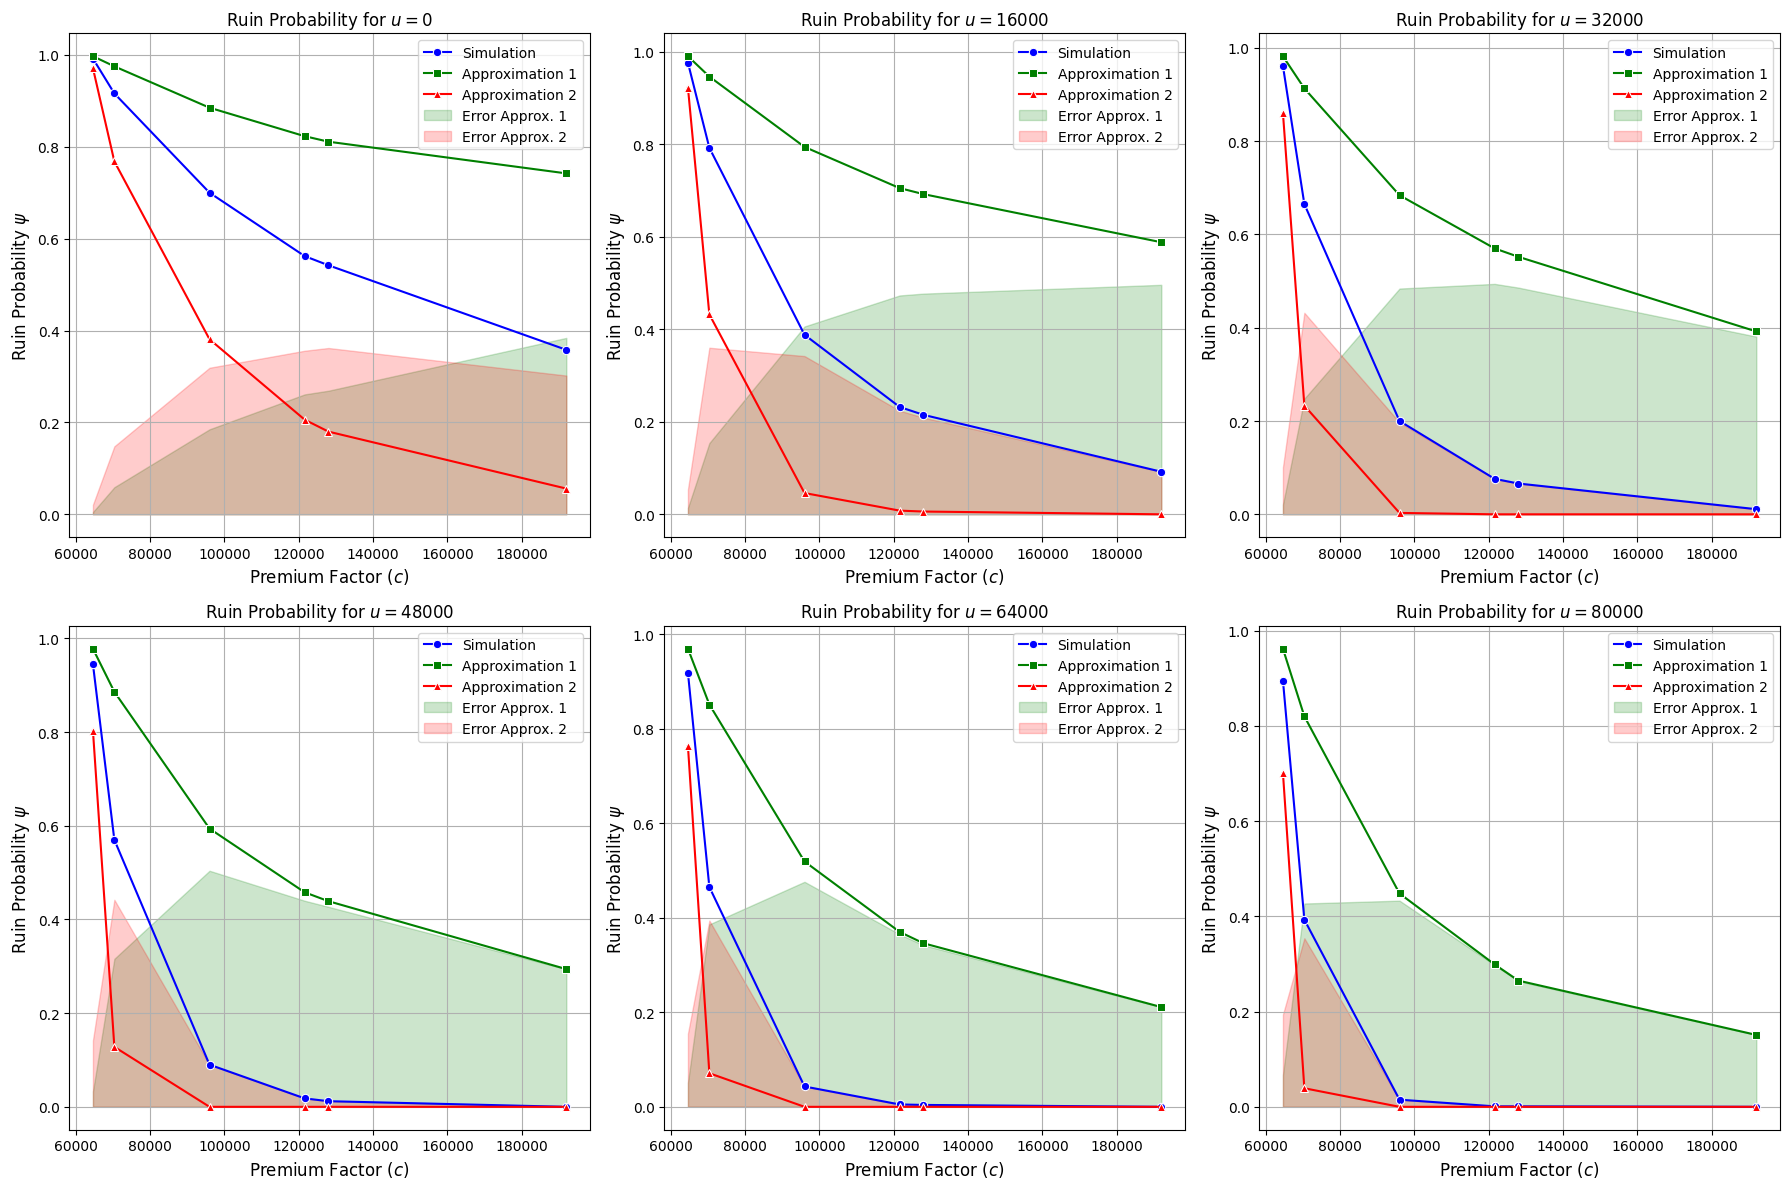

In [48]:
import pandas as pd

Lambda1 = 1/0.8
Mean1 = 0.2/0.8
Lambda2 = 1/16
Mean2 = 4/16

# File paths
file_paths = {
    'sim' : '/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q1_model_simulation_results.csv',
    'sim_gamma1': '/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q5_gamma_02_08_model_simulation_results.csv',
    'sim_gamma2': '/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q5_gamma_4_16_model_simulation_results.csv',
}

# Initialize an empty dictionary to store organized DataFrames
organized_dfs = {}

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to compute differences
def compute_difference(df_sim, df_approx, key):
    # Merge on 'u0', 'Theta', and 'c' to ensure consistency
    merged = pd.merge(df_sim, df_approx, on=['u0', 'Theta', 'c'], suffixes=('_sim', f'_{key}'))
    merged['diff'] = abs(merged['psi_sim'] - merged[f'psi_{key}'])
    return merged

# Ensure 'c' columns are added to all dataframes
sim['c'] = (1 + sim['Theta']) * Lambda * Mean
sim_gamma1['c'] = (1 + sim_gamma1['Theta']) * Lambda * Mean
sim_gamma2['c'] = (1 + sim_gamma2['Theta']) * Lambda * Mean

# Unique Theta values
unique_theta = sim['Theta'].unique()

# First Graph: Comparison for each Theta
plt.figure(figsize=(18, 12))
for i, theta in enumerate(unique_theta):
    plt.subplot(2, 3, i + 1)
    
    # Filter data for the current Theta
    sim_theta = sim[sim['Theta'] == theta]
    gamma1_theta = sim_gamma1[sim_gamma1['Theta'] == theta]
    gamma2_theta = sim_gamma2[sim_gamma2['Theta'] == theta]
    
    # Compute differences
    diff1 = compute_difference(sim_theta, gamma1_theta, 'gamma1')
    diff2 = compute_difference(sim_theta, gamma2_theta, 'gamma2')

    # Plot the data
    sns.lineplot(data=sim_theta, x='u0', y='psi', label='Simulation', marker='o', color='blue')
    sns.lineplot(data=gamma1_theta, x='u0', y='psi', label='Approximation 1', marker='s', color='green')
    sns.lineplot(data=gamma2_theta, x='u0', y='psi', label='Approximation 2', marker='^', color='red')

    # Shaded areas for differences
    plt.fill_between(diff1['u0'], 0, diff1['diff'], alpha=0.2, label='Error Approx. 1', color='green')
    plt.fill_between(diff2['u0'], 0, diff2['diff'], alpha=0.2, label='Error Approx. 2', color='red')

    # Add title and labels
    c = (1 + theta) * Lambda * Mean
    plt.title(f'Ruin Probability for $c = {c}$')
    plt.xlabel('Initial Capital ($u_0$)', fontsize=12)
    plt.ylabel('Ruin Probability $\psi$', fontsize=12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Second Graph: Comparison for each u0
plt.figure(figsize=(18, 12))
for i, u0 in enumerate(sorted(sim['u0'].unique())):
    plt.subplot(2, 3, i + 1)
    
    # Filter data for the current u0
    sim_u0 = sim[sim['u0'] == u0]
    gamma1_u0 = sim_gamma1[sim_gamma1['u0'] == u0]
    gamma2_u0 = sim_gamma2[sim_gamma2['u0'] == u0]
    
    # Compute differences
    diff1 = compute_difference(sim_u0, gamma1_u0, 'gamma1')
    diff2 = compute_difference(sim_u0, gamma2_u0, 'gamma2')

    # Plot the data
    sns.lineplot(data=sim_u0, x='c', y='psi', label='Simulation', marker='o', color='blue')
    sns.lineplot(data=gamma1_u0, x='c', y='psi', label='Approximation 1', marker='s', color='green')
    sns.lineplot(data=gamma2_u0, x='c', y='psi', label='Approximation 2', marker='^', color='red')

    # Shaded areas for differences
    plt.fill_between(diff1['c'], 0, diff1['diff'], alpha=0.2, label='Error Approx. 1', color='green')
    plt.fill_between(diff2['c'], 0, diff2['diff'], alpha=0.2, label='Error Approx. 2', color='red')

    # Add title and labels
    plt.title(f'Ruin Probability for $u = {u0}$')
    plt.xlabel('Premium Factor $(c)$', fontsize=12)
    plt.ylabel('Ruin Probability $\psi$', fontsize=12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



# Q6 Graphs

<Figure size 1800x1200 with 0 Axes>

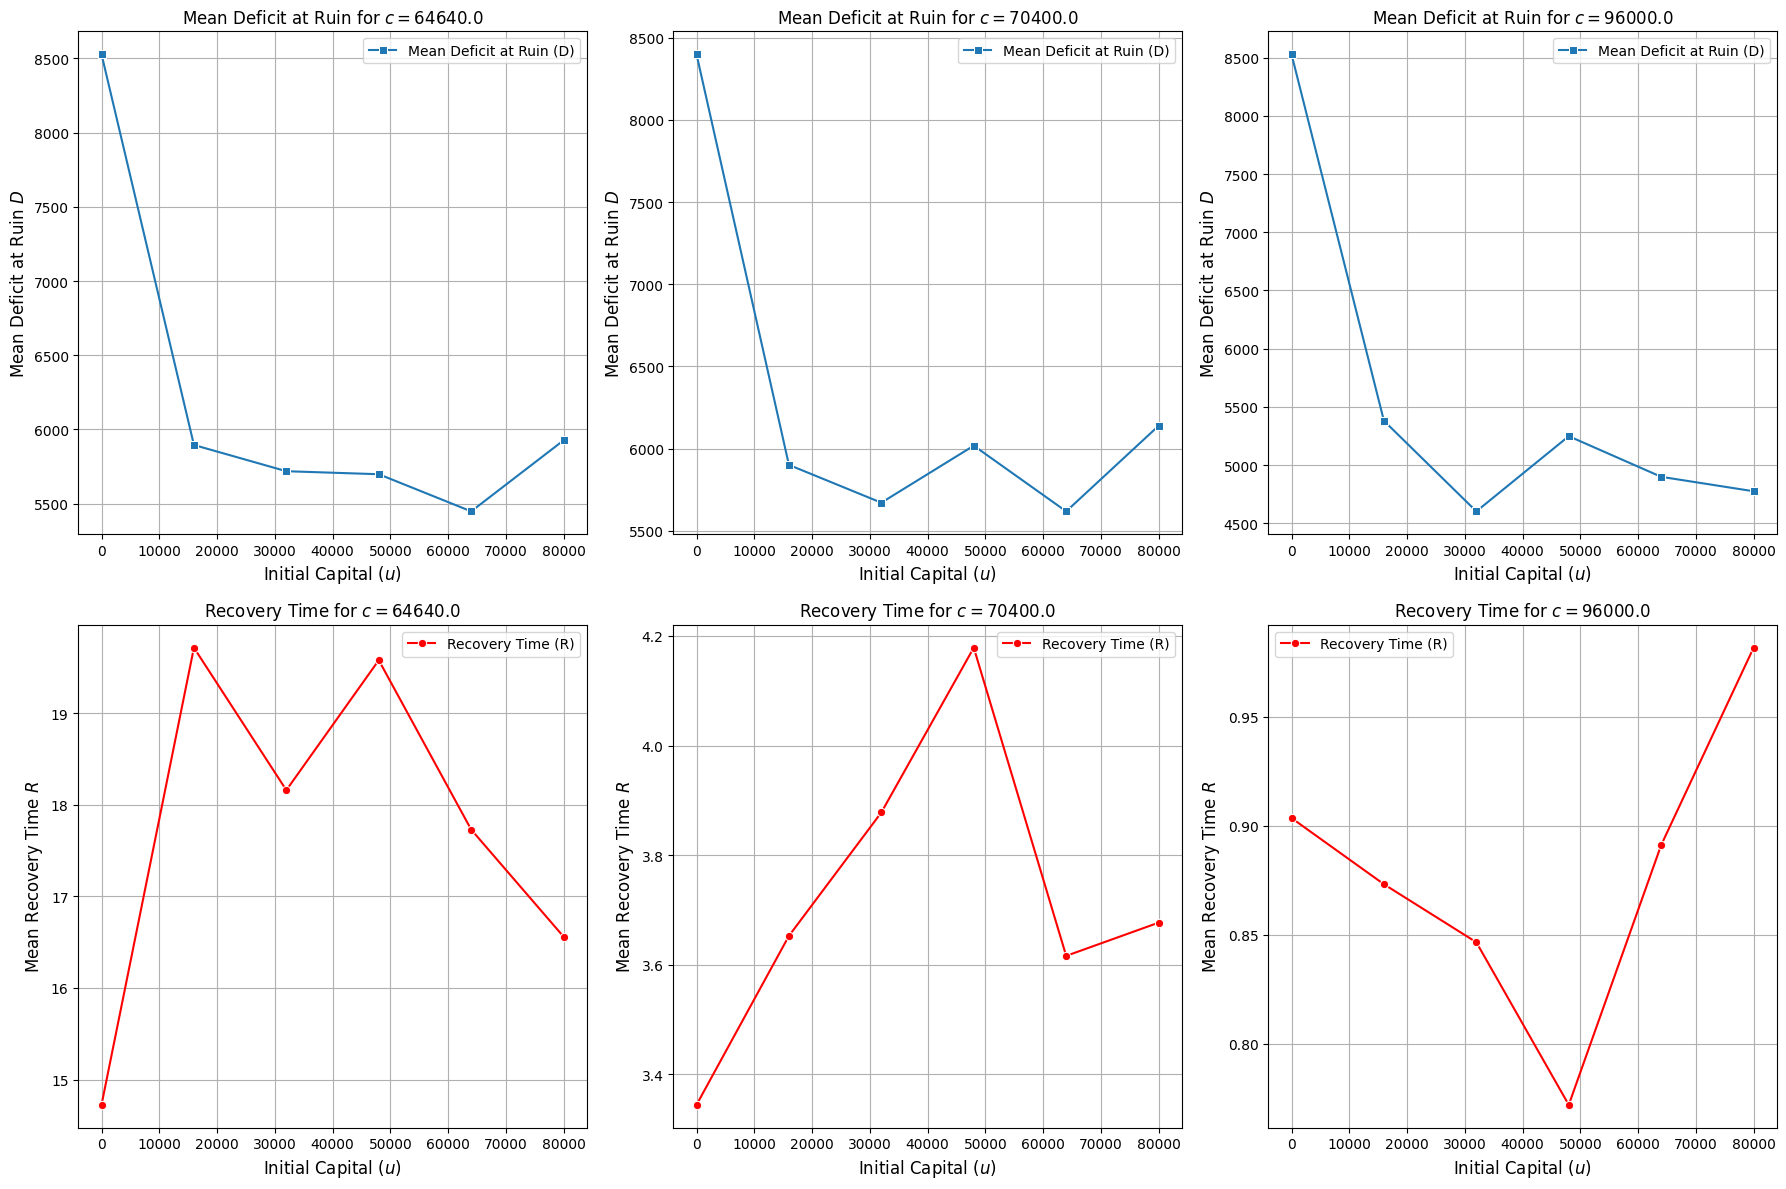

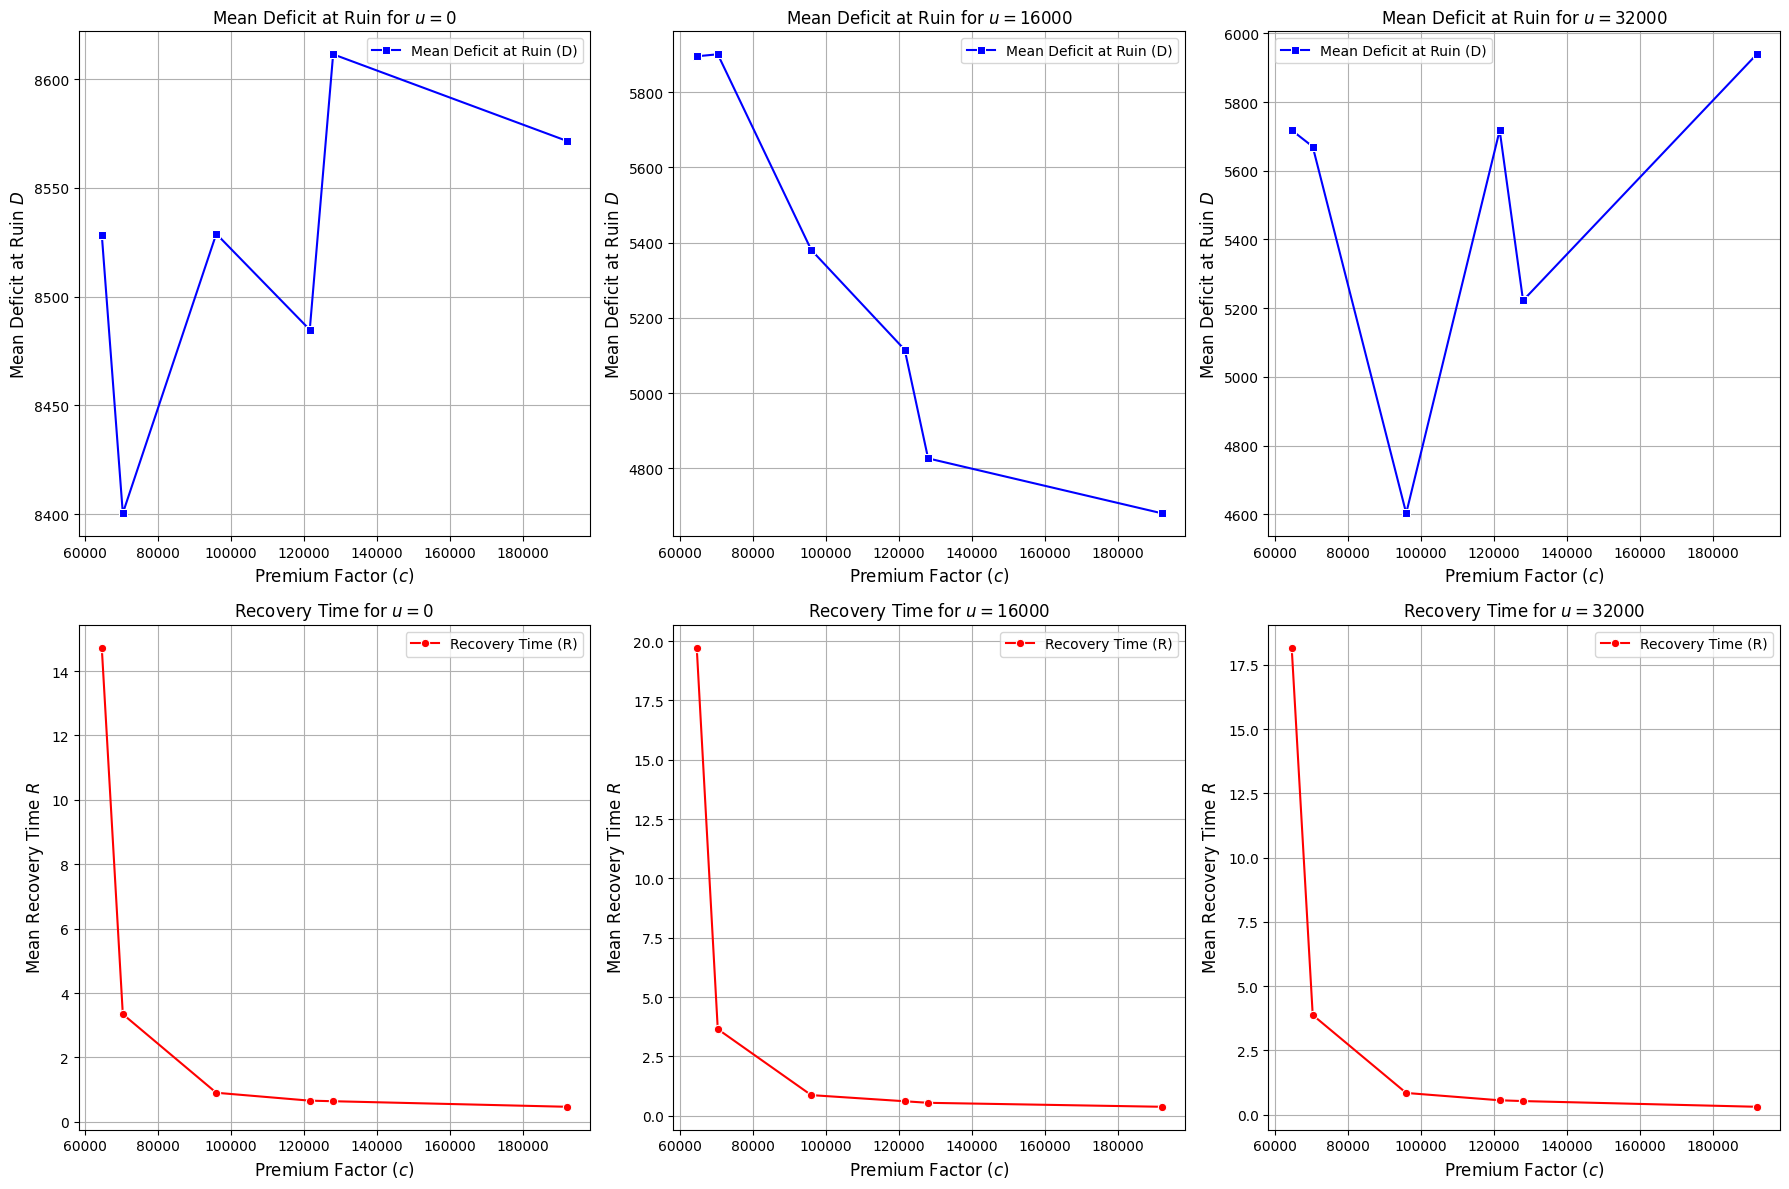

In [45]:
import pandas as pd

Lambda = 4
Mean = 16000

# File paths
file_paths = {
    'sim_d': "/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q6_D_simulation_results.csv",
    'sim_r': '/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q6_R_simulation_results.csv',
}

# Initialize an empty dictionary to store organized DataFrames
organized_dfs = {}

# Loop through each file, read, and organize
for key, path in file_paths.items():
    df = pd.read_csv(path, index_col=0)  # Read the CSV
    df = df.reset_index().melt(id_vars='index', var_name='Theta', value_name='psi')  # Reshape
    df.columns = ['u0', 'Theta', 'psi']  # Rename columns
    df['Theta'] = df['Theta'].astype(float)  # Convert Theta to float
    df['u0'] = df['u0'].astype(int)  # Convert u0 to int
    
    organized_dfs[key] = df  # Store the organized DataFrame

# Access each organized DataFrame
sim_d = organized_dfs['sim_d']
sim_r = organized_dfs['sim_r']

# Compute 'c' and update the 'Theta' column to 'c' in all DataFrames
sim_d['c'] = (1 + sim_d['Theta']) * Lambda * Mean
sim_r['c'] = (1 + sim_r['Theta']) * Lambda * Mean

# Iterate over each unique Theta and plot separately
unique_theta = sim_d['Theta'].unique()

plt.figure(figsize=(18, 12))
# Iterate over the first three unique Theta values for Mean Deficit at Ruin
plt.figure(figsize=(18, 12))

# First row: Mean Deficit at Ruin
for i, theta in enumerate(unique_theta[:3]):  # Iterate over the first three unique Theta values
    plt.subplot(2, 3, i + 1)  # First row of subplots
    
    # Filter data for the current Theta
    sim_d_theta = sim_d[sim_d['Theta'] == theta]

    # Plot Mean Deficit at Ruin
    sns.lineplot(data=sim_d_theta, x='u0', y='psi', marker='s', label='Mean Deficit at Ruin (D)')

    # Title and labels
    c = (1 + theta) * Lambda * Mean
    plt.title(f'Mean Deficit at Ruin for $c = {c}$')
    plt.xlabel('Initial Capital ($u$)', fontsize=12)
    plt.ylabel('Mean Deficit at Ruin $D$', fontsize=12)
    plt.legend()
    plt.grid(True)

# Second row: Recovery Time
for i, theta in enumerate(unique_theta[:3]):  # Iterate over the first three unique Theta values
    plt.subplot(2, 3, i + 4)  # Second row of subplots (4th, 5th, 6th positions)
    
    # Filter data for the current Theta
    sim_r_theta = sim_r[sim_r['Theta'] == theta]

    # Plot Recovery Time
    sns.lineplot(data=sim_r_theta, x='u0', y='psi', marker='o', color='r', label='Recovery Time (R)')

    # Title and labels
    c = (1 + theta) * Lambda * Mean
    plt.title(f'Recovery Time for $c = {c}$')
    plt.xlabel('Initial Capital ($u$)', fontsize=12)
    plt.ylabel('Mean Recovery Time $R$', fontsize=12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))

# First row: Mean Deficit at Ruin
for i, u0 in enumerate(sorted(sim_d['u0'].unique())[:3]):
    plt.subplot(2, 3, i + 1)  # Subplots 1–3 for the first row
    
    # Filter data for the current `u0`
    sim_d_u0 = sim_d[sim_d['u0'] == u0]
    
    # Plot Mean Deficit at Ruin
    sns.lineplot(data=sim_d_u0, x='c', y='psi', marker='s', color='b', label='Mean Deficit at Ruin (D)')
    
    # Title and labels
    plt.title(f'Mean Deficit at Ruin for $u = {u0}$')
    plt.xlabel('Premium Factor $(c)$', fontsize=12)
    plt.ylabel('Mean Deficit at Ruin $D$', fontsize=12)
    plt.legend()
    plt.grid(True)

# Second row: Recovery Time
for i, u0 in enumerate(sorted(sim_r['u0'].unique())[:3]):
    plt.subplot(2, 3, i + 4)  # Subplots 4–6 for the second row
    
    # Filter data for the current `u0`
    sim_r_u0 = sim_r[sim_r['u0'] == u0]
    
    # Plot Recovery Time
    sns.lineplot(data=sim_r_u0, x='c', y='psi', marker='o', color='r', label='Recovery Time (R)')
    
    # Title and labels
    plt.title(f'Recovery Time for $u = {u0}$')
    plt.xlabel('Premium Factor $(c)$', fontsize=12)
    plt.ylabel('Mean Recovery Time $R$', fontsize=12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



# Q7 graphs

/tmp/ipykernel_370/3890170630.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_370/3890170630.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_370/3890170630.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_370/3890170630.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_370/3890170630.py:48: UserWarning: No artists with labels found to put in legend.  Note that arti

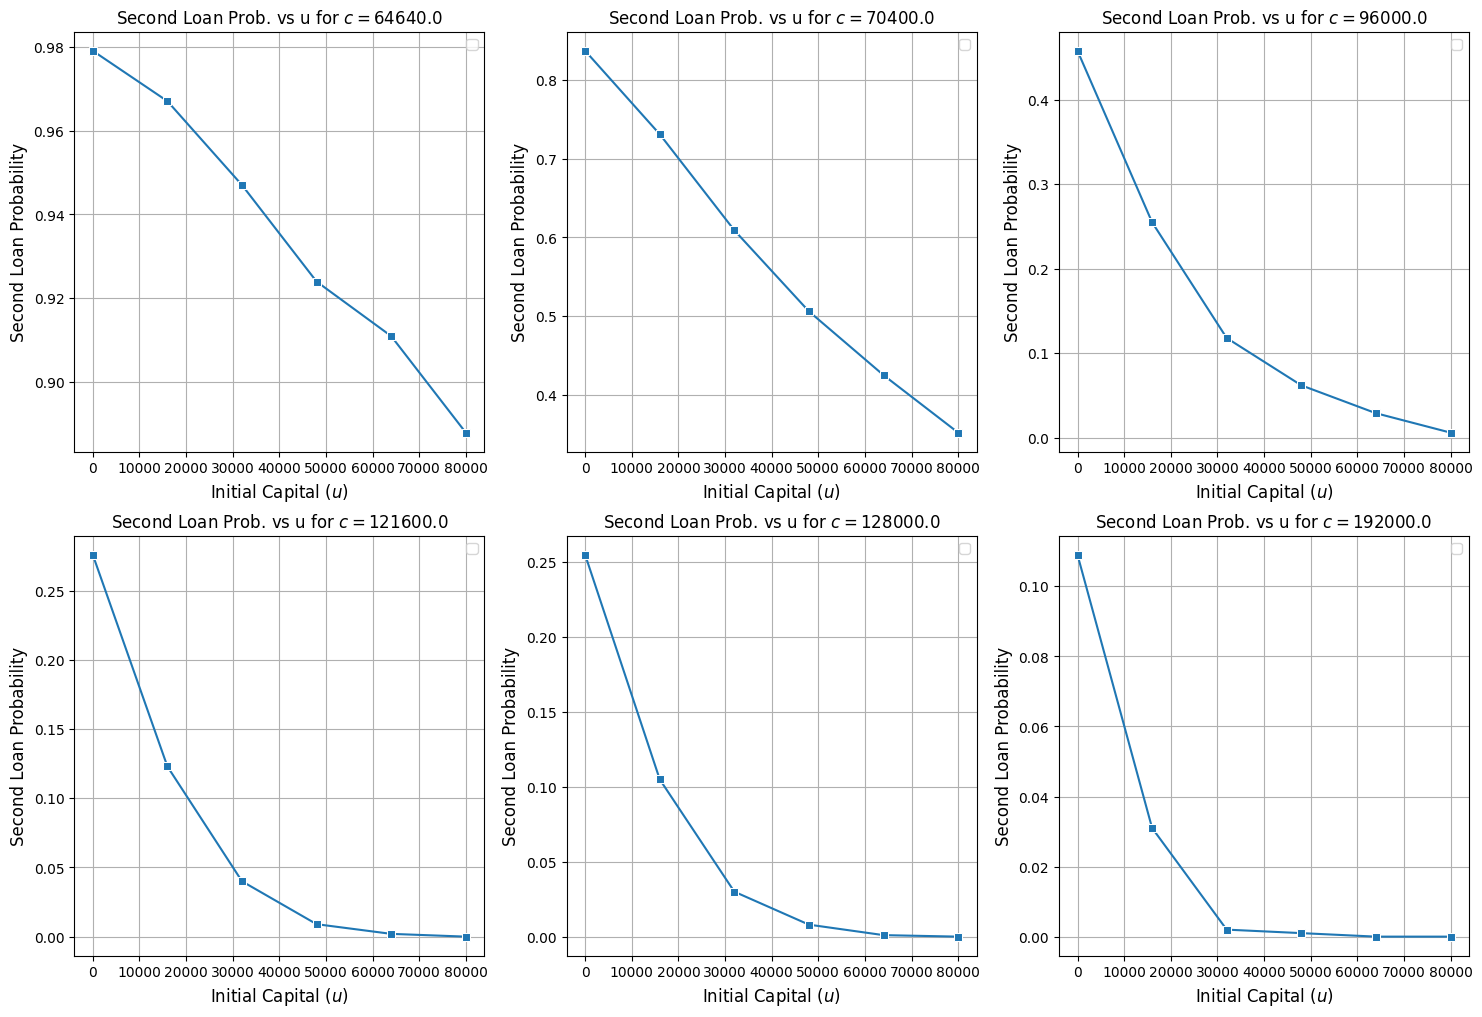

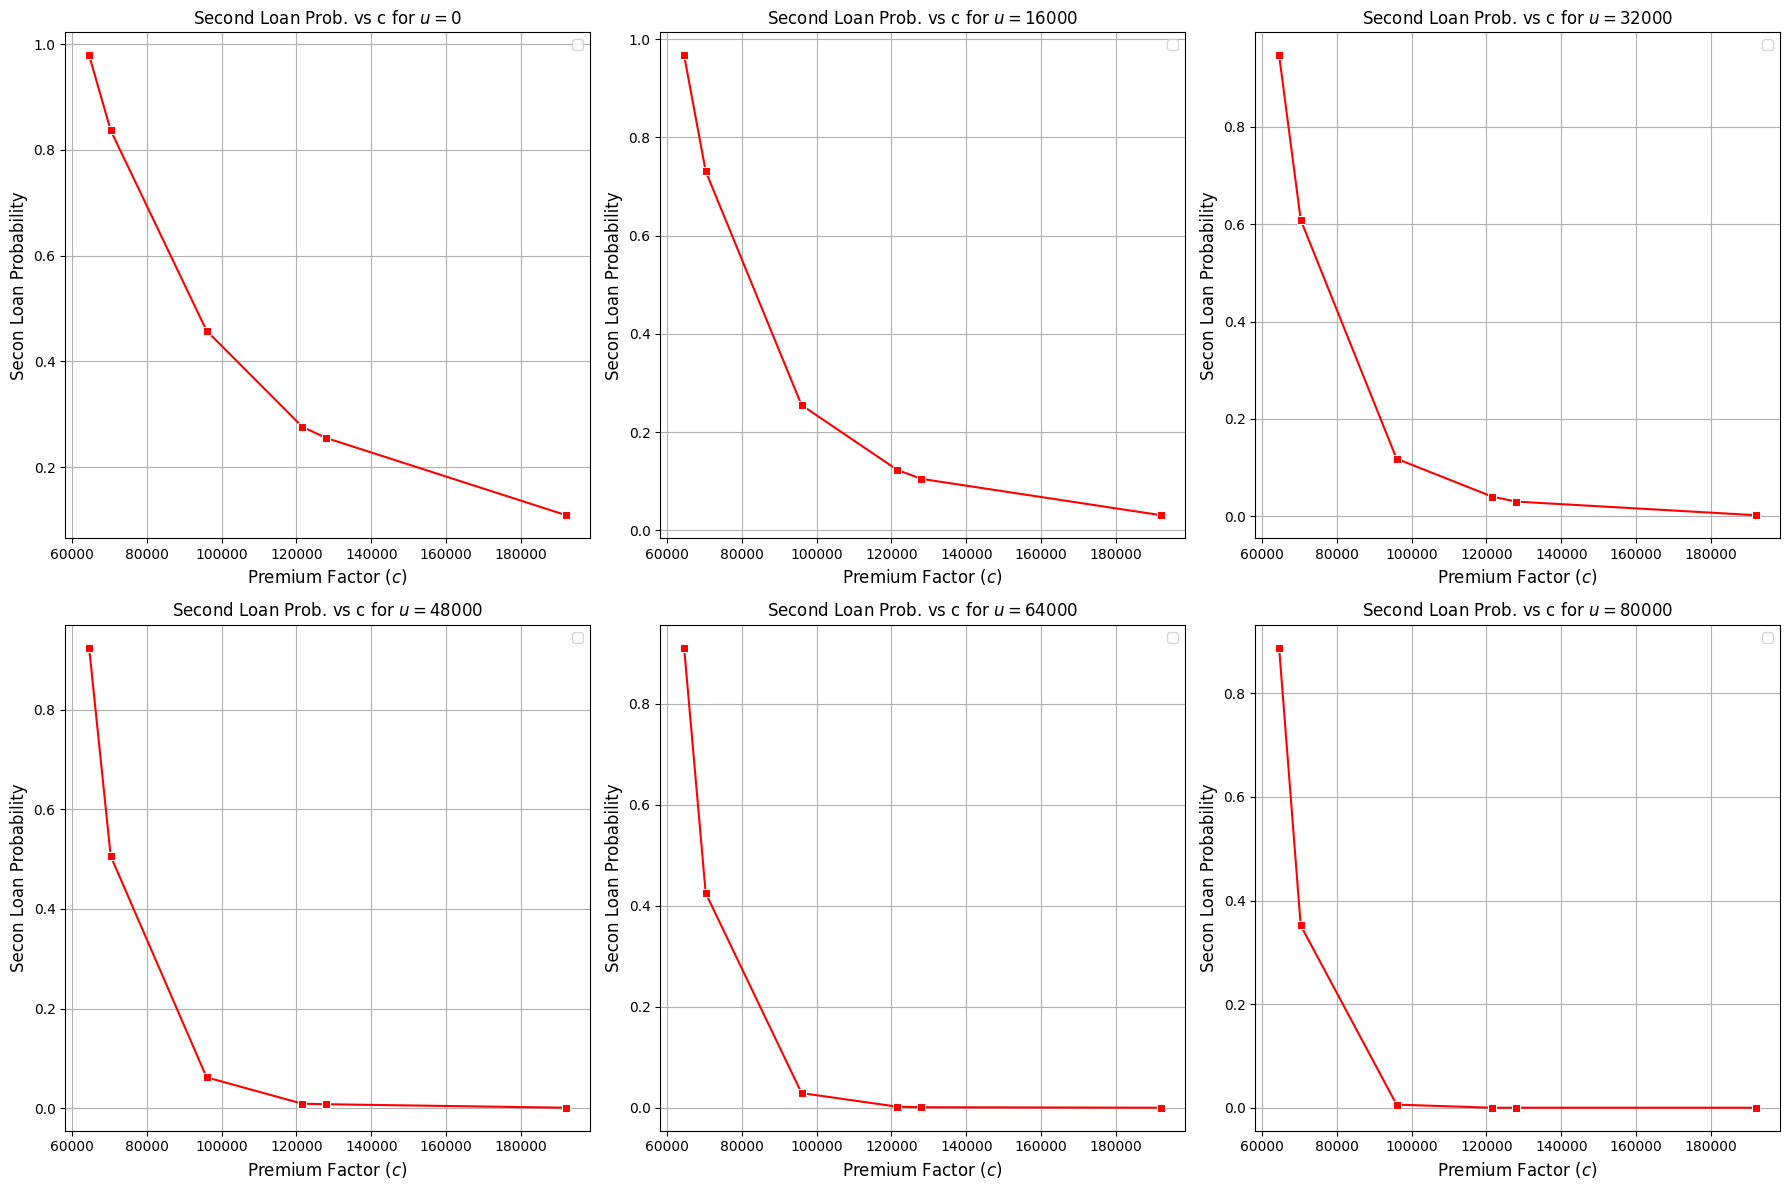

In [36]:
import pandas as pd

Lambda = 4
Mean = 16000

# File paths
file_paths = {
    'sim': '/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q7_model_simulation_results.csv',
}

# Initialize an empty dictionary to store organized DataFrames
organized_dfs = {}

# Loop through each file, read, and organize
for key, path in file_paths.items():
    df = pd.read_csv(path, index_col=0)  # Read the CSV
    df = df.reset_index().melt(id_vars='index', var_name='Theta', value_name='psi')  # Reshape
    df.columns = ['u0', 'Theta', 'psi']  # Rename columns
    df['Theta'] = df['Theta'].astype(float)  # Convert Theta to float
    df['u0'] = df['u0'].astype(int)  # Convert u0 to int
    
    organized_dfs[key] = df  # Store the organized DataFrame

# Access each organized DataFrame
sim = organized_dfs['sim']

# Compute 'c' and update the 'Theta' column to 'c' in all DataFrames
sim['c'] = (1 + sim_d['Theta']) * Lambda * Mean

# Iterate over each unique Theta and plot separately
unique_theta = sim['Theta'].unique()

plt.figure(figsize=(18, 12))
for i, theta in enumerate(unique_theta):
    plt.subplot(2, 3, i+1)
    
    # Filter data for the current Theta
    sim_theta = sim[sim['Theta'] == theta]

    # Plot data
    sns.lineplot(data=sim_theta, x='u0', y='psi', marker='s')


    c = (1 + theta)*Lambda*Mean
    plt.title(f'Second Loan Prob. vs u for $c = {c}$')
    plt.xlabel('Initial Capital ($u$)', fontsize = 12)
    plt.ylabel('Second Loan Probability', fontsize = 12)
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(18, 12))
for i, u0 in enumerate(sorted(sim['u0'].unique())):
    plt.subplot(2, 3, i+1)
    
    # Filter data for the current Theta
    sim_u0 = sim[sim['u0'] == u0]

    # Plot data
    sns.lineplot(data=sim_u0, x='c', y='psi', marker='s', color='r')

    plt.title(f'Second Loan Prob. vs c for $u = {u0}$')
    plt.xlabel('Premium Factor $(c)$', fontsize = 12)
    plt.ylabel('Secon Loan Probability', fontsize = 12)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()